In [1]:
from scipy import ndimage
from scipy import misc
import numpy
from matplotlib import pyplot
from scipy.misc import toimage
import scipy.misc
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
import keras.layers
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

Using TensorFlow backend.


/home/leyla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  from ipykernel import kernelapp as app


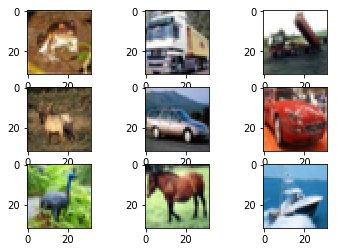

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

# normalize inputs from 0-255 to 0.0-1.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

for i in range(0, 9):
 pyplot.subplot(330 + 1 + i)
 pyplot.imshow(toimage(X_train[i]))
# show the plot
pyplot.show()

In [5]:
kedi = ndimage.imread("/home/leyla/deer.jpg")
kedi = scipy.misc.imresize(kedi,(32,32))
kedi = numpy.array(kedi)
print("Başarılı bir eğitim başladı.")
kedi = kedi.reshape(1,3,32,32)


model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(1000, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 5
lrate = 0.001
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

model.fit(X_train, y_train, validation_split=0.5, epochs=epochs, batch_size=64)

scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

print("---------------")
print(model.predict_classes(kedi))

/home/leyla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.
/home/leyla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Başarılı bir eğitim başladı.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 16, 16)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 32, 8, 8)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 8, 8)          9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 4, 4)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 4, 4)  